# Libraries

In [1]:
import pandas as pd               # primary data structure library
import numpy as np                # library scientific computing in python 
import matplotlib.pyplot as plt   # for plotting 
from wordcloud import WordCloud   # for plot word cloud 
import folium                     # for geospatial plot
from folium import plugins        # for using plugins in folium
import requests                   # for using requests in json
%matplotlib inline
# matplotlib notebook
pd.set_option("display.max.columns",None) # set to see all columns dataframe 

# Load Data

In [2]:
df_london_crime = pd.read_csv('dataset/london_crime_by_lsoa.csv') #Untuk membaca dataset
df_london_crime #Untuk menampilkan dataset

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df_london_crime.info() #Untuk menampilkan informasi fitur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
df_london_crime.isnull().sum() #Untuk mengecek jumlah data yang hilang tiap fitur

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [5]:
df_london_crime.duplicated().sum() #Untuk mengecek data duplikat

0

# Area Plot

## Question

5 Wilayah mana yang memiliki jumlah tindakan kriminal tertinggi di London pada tahun 2008 - 2016 ?

## Preprocessing

In [6]:
#Membuat DataFrame temporary untuk menampung nilai value
df_temp = df_london_crime.groupby(["borough","year"])[["value"]].sum()

#Mengubah nama kolom value menjadi total
df_temp.rename(columns={"value":"total"}, inplace=True)

#Reset index menjadi awal terlebih dahulu
df_temp.reset_index(inplace=True)

#Membuat variabel boroughs untuk menampung list borough yang ada di dalam DataFrame df_temp
boroughs = list(df_temp["borough"].unique())

#Membuat variabel years untuk menampung list year yang ada di dalam DataFrame df_temp
years = list(df_temp["year"].unique())

#Inisialisasi DataFrame kosong dengan kolom dari years dan index dari boroughs
df_total_crime_by_borough_and_year = pd.DataFrame(None, columns=years, index=boroughs)

#Mengisi data pada DataFrame df_total_crime_by_borough_and_year
for borough in boroughs:
    for year in years:
        n=df_temp.loc[
            (df_temp["borough"] == borough) 
            & (df_temp["year"] == year)]
        for total in n["total"]:
            df_total_crime_by_borough_and_year.at[borough, year] = total

#Membuat kolom total yang akan digunakan untuk mengurutkan borough
df_total_crime_by_borough_and_year["total"] = df_total_crime_by_borough_and_year.sum(axis=1)

#Urutkan data berdasarkan kolom total secara descending
df_total_crime_by_borough_and_year.sort_values(["total"], ascending=False, inplace=True)

#Ambil 5 data teratas
df_top5_borough = df_total_crime_by_borough_and_year.head()

#Delete kolom total dikarenakan tidak dibutuhkan dalam pembuatan Area Plot
del df_top5_borough["total"]

#Transposekan df_top5_borough agar boroughnya yang menjadi kolom dan year menjadi indexnya
df_top5_borough = df_top5_borough.transpose()
df_total_crime_by_borough_and_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551


## Visualization

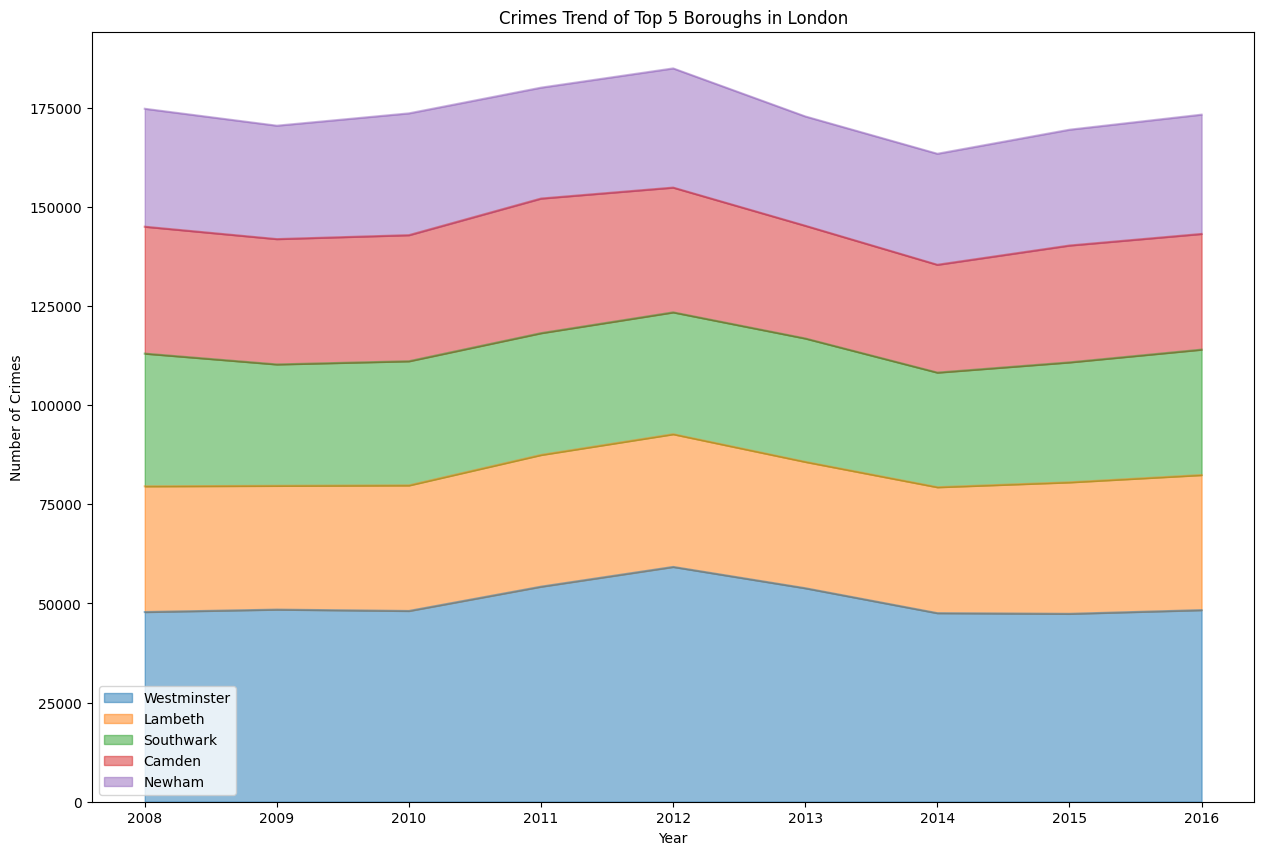

In [7]:
#Membuat Area Plot
df_top5_borough.plot(kind="area",
                    stacked=True,
                    figsize=(15,10),
                    alpha=0.5
                    )
plt.title("Crimes Trend of Top 5 Boroughs in London")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

#Display plot
plt.show()

## Conclusion

Wilayah Westminster, Lambeth, Southwark, Camden, dan Newham adalah wilayah dengan jumlah tindakan kriminal tertinggi.

# Histogram

## Question

Dari Area Plot, terdapat peningkatan jumlah tindakan kriminal pada tahun 2012. Berapa banyak frekuensi distribusi jumlah tingkat kriminal dari berbagai wilayah pada London pada tahun 2012?

## Preprocessing

In [8]:
#Mengambil data jumlah tindakan kriminal di wilayah masing - masing pada London pada tahun 2012.
df_london_crime_2012 = df_total_crime_by_borough_and_year[2012]

#Menghitung banyak dan bin
count, bin_edges = np.histogram(df_london_crime_2012)

## Visualization

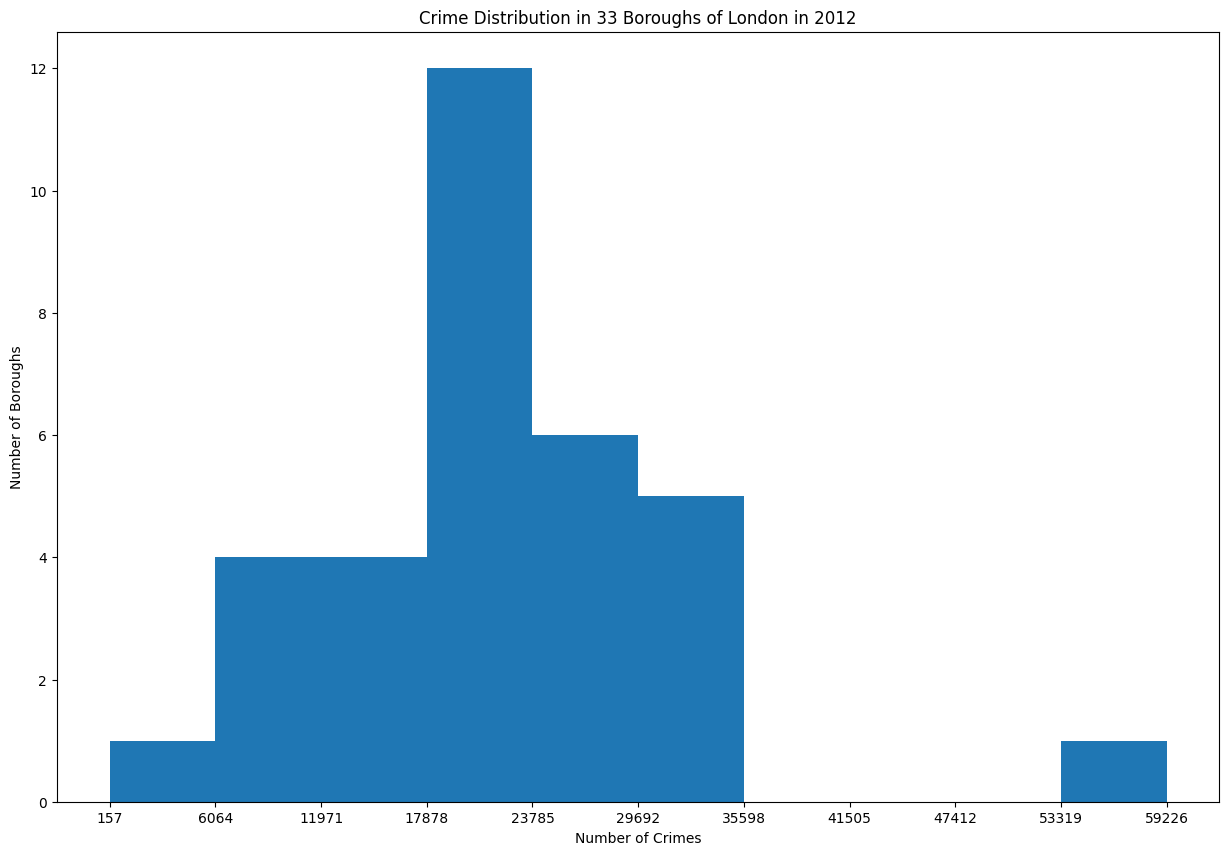

In [9]:
#Membuat plot Histogram
df_london_crime_2012.plot(kind="hist", figsize=(15,10), xticks=list(bin_edges))
plt.title("Crime Distribution in 33 Boroughs of London in 2012")
plt.ylabel("Number of Boroughs")
plt.xlabel("Number of Crimes")

#Display plot
plt.show()

## Conclusion

Dari visualisasi Histogram tersebut dapat dilihat bahwa ada 12 wilayah yang menyumbang sekitaran 17878 - 23785 jumlah tindakan kriminal di London, 1 wilayah yang menyumbang sekitar 157 - 6064 jumlah tindakan kriminal di London, 1 wilayah yang menyumbang sekitar 53319 - 59226 jumlah tindakan kriminal di London. Kesimpulannya adalah hanya ada 1 wilayah yang memiliki jumlah tindakan kriminal yang rendah dan kebanyakan wilayah menyumbang sekitaran 17878 - 23785 jumlah tindakan kriminal pada tahun 2012.

# Bar Plot

## Question

Bagaimana kondisi total tindakan kriminal pada setiap wilayah di London dari tahun 2008 - 2016?

## Preprocessing

In [10]:
#Membuat DataFrame temporary untuk menampung nilai value
df_temp = df_london_crime.groupby(["borough","major_category"])[["value"]].sum()

#Mengubah nama kolom value menjadi total
df_temp.rename(columns={"value":"total"}, inplace=True)

#Reset index menjadi awal terlebih dahulu
df_temp.reset_index(inplace=True)

#Membuat variabel boroughs untuk menampung list borough yang ada di dalam DataFrame df_temp
boroughs = list(df_temp["borough"].unique())

#Membuat variabel categories untuk menampung list major_category yang ada di dalam DataFrame df_temp
categories = list(df_temp["major_category"].unique())

#Inisialisasi DataFrame kosong dengan kolom dari categories dan index dari boroughs
df_total_crime_by_borough_and_category = pd.DataFrame(None, columns=categories, index=boroughs)

#Mengisi data pada DataFrame df_total_crime_by_borough_and_category
for borough in boroughs:
    for category in categories:
        total = df_temp.loc[(df_temp["borough"] == borough) & (df_temp["major_category"] == category)]
        
        #If ini digunakan untuk mengganti value total yang bernilai Series kosong menjadi 0
        for total in total["total"]:
            df_total_crime_by_borough_and_category.at[borough, category] = int(total)
            df_total_crime_by_borough_and_category.fillna(0,inplace=True)
df_total_crime_by_borough_and_category

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091
Barnet,36981,21024,9796,175,2953,7374,38,87285,46565
Bexley,14973,17244,7346,106,1999,2338,22,40071,30037
Brent,28923,20569,25978,157,3711,12473,39,72523,63178
Bromley,27135,24039,8942,196,2637,4868,31,69742,46759
Camden,27939,18482,21816,123,3857,9286,36,140596,53012
City of London,15,16,33,0,17,24,0,561,114
Croydon,33376,31218,19162,270,4340,12645,55,91437,67791
Ealing,30831,25613,18591,175,4406,9568,52,93834,68492
Enfield,30213,22487,13251,132,3293,9059,38,70371,45036


## Visualization

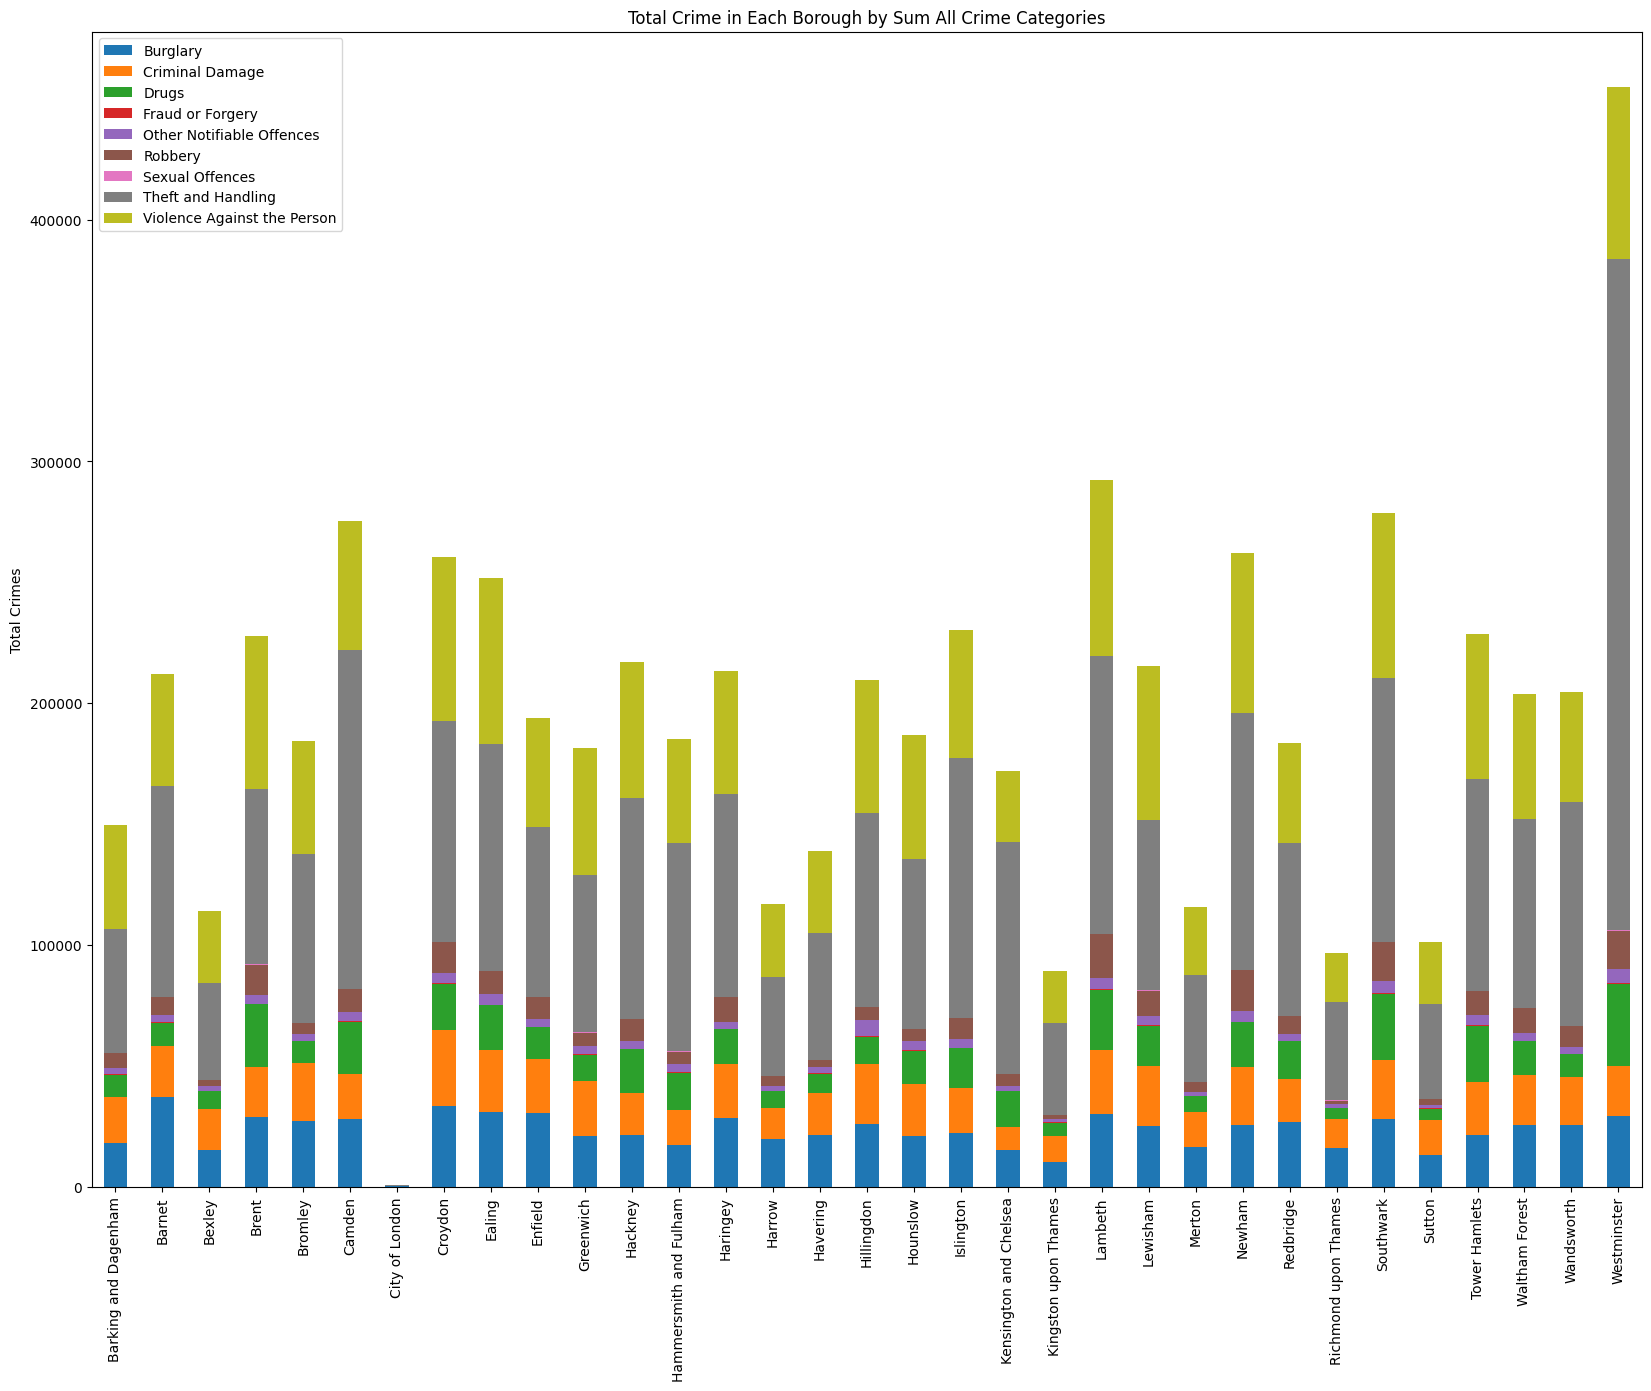

In [11]:
#Membuat Bar Plot
df_total_crime_by_borough_and_category.plot(kind='bar', stacked=True, figsize=(20,15))
plt.title("Total Crime in Each Borough by Sum All Crime Categories")
plt.ylabel("Total Crimes")

#Display plot
plt.show()

## Conclusion

Dari visualisasi tersebut dapat disimpulkan bahwa City of London memiliki total tindakan kriminal yang sangat minim dan Westminster memiliki total tindakan kriminal yang paling besar diantara semuanya. Tindakan kriminal yang sering terjadi pada seluruh wilayah adalah berupa Theft and Handling dan yang jarang terjadi adalah Sexual Offences.

# Pie Chart

## Question

Berapakah presentase kejadian berdasarkan kategori ?

## Preprocessing

In [12]:
#Mengambil jumlah kejahatan di London berdasarkan major_category menggunakan groupby dan sum
df_percentage_crime = df_london_crime.groupby(["major_category"])[["value"]].sum()
df_percentage_crime

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


## Visualization

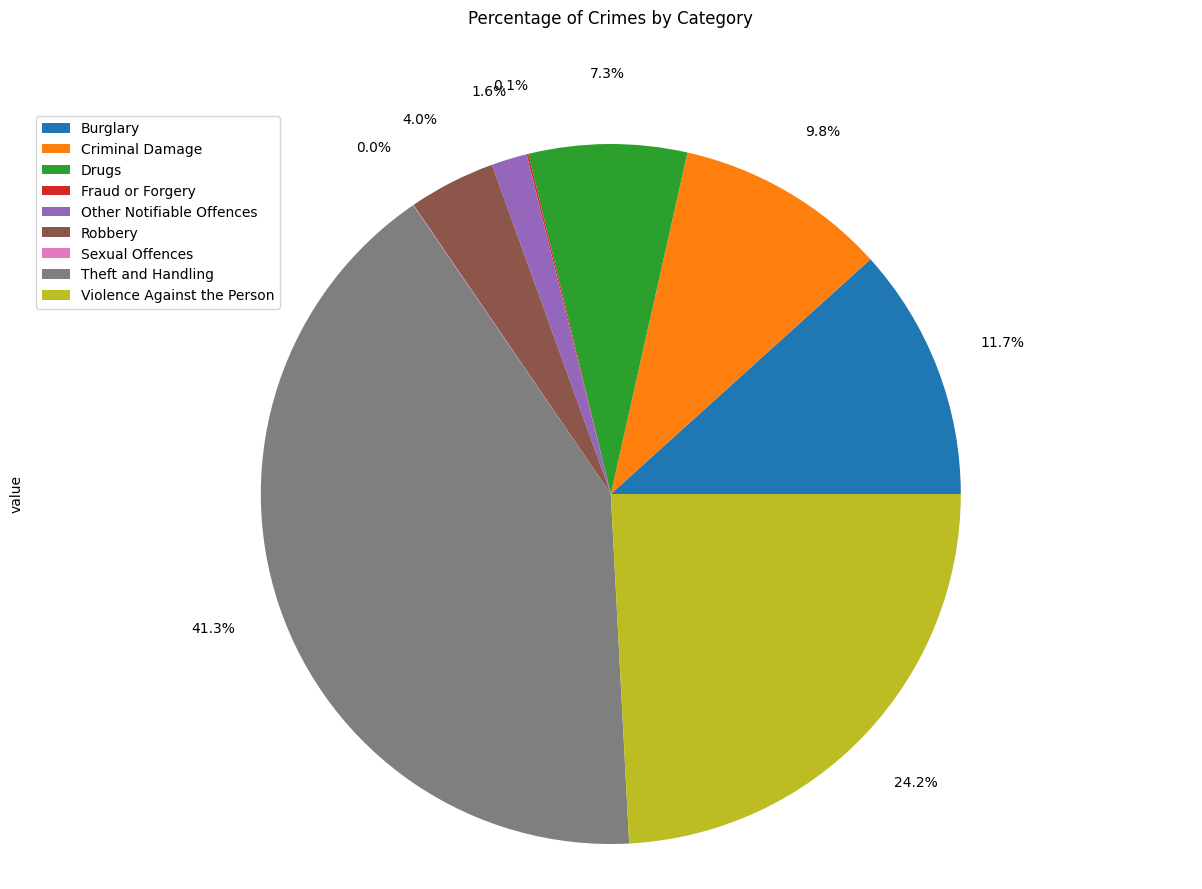

In [13]:
#Membuat Pie Chart
df_percentage_crime["value"].plot(kind="pie", figsize=(15,10), autopct="%1.1f%%", pctdistance=1.2, labels=None)
plt.title("Percentage of Crimes by Category", y = 1.1)
plt.axis("equal")
plt.legend(labels=df_percentage_crime.index, loc="upper left")

#Display plot
plt.show()

## Conclusion

Dari visualisasi diatas dapat disimpulkan bahwa Theft and Handling memiliki persentase terbesar dimana bisa dilihat pada visualisasi Bar sebelumnya. Setelah Theft and Handling, diikuti oleh Violence dan Burglary.

# Box Plot

## Question

Bagaimana jumlah tindakan kriminal tiap bulannya di London dari tahun 2008 - 2016 ?

## Preprocessing

In [14]:
#Membuat DataFrame temporary untuk menampung nilai value
df_temp = df_london_crime.groupby(["month","year"])[["value"]].sum()

#Mengubah nama kolom value menjadi total
df_temp.rename(columns={"value":"total"}, inplace=True)

#Reset index menjadi awal terlebih dahulu
df_temp.reset_index(inplace=True)

#Membuat variabel months untuk menampung list month yang ada di dalam DataFrame df_temp
months = list(df_temp["month"].unique())

#Membuat variabel years untuk menampung list year yang ada di dalam DataFrame df_temp
years = list(df_temp["year"].unique())

#Inisialisasi DataFrame kosong dengan kolom dari months dan index dari years
df_total_crime_by_month_and_year = pd.DataFrame(None, columns=months, index=years)

#Mengisi data pada DataFrame df_total_crime_by_month_and_year
for month in months:
    for year in years:
        total = df_temp.loc[(df_temp["year"] == year) & (df_temp["month"] == month)]
        
        for i in total["total"]:
            df_total_crime_by_month_and_year.at[year, month] = i

#Konversi dtypes objects menjadi int64
for month in months:
    df_total_crime_by_month_and_year[month] = df_total_crime_by_month_and_year[month].astype("int64")
df_total_crime_by_month_and_year

,1,2,3,4,5,6,7,8,9,10,11,12
2008,65419,62626,61343,59640,62587,62290,64126,59959,58414,63354,61395,57488
2009,59142,54706,63482,59181,62897,63116,63281,58695,57847,61176,59456,54235
2010,54934,55069,63629,60085,62126,62632,63764,59040,59731,62113,60665,51536
2011,57966,54895,61282,58714,62630,61822,62428,59117,58640,63622,64119,59680
2012,62436,56735,67537,58801,64344,62281,63280,62143,56912,61728,62514,58618
2013,58933,55271,57590,55678,56765,56839,60508,57467,54924,59956,58267,54209
2014,55515,51222,57669,53467,56327,57039,58564,55641,56933,60537,59704,57565
2015,57055,53316,60096,56445,61038,60760,61606,58056,57564,62361,62487,60840
2016,58847,56697,59167,58637,63990,62262,65519,62666,61412,63405,61064,62455


## Visualization

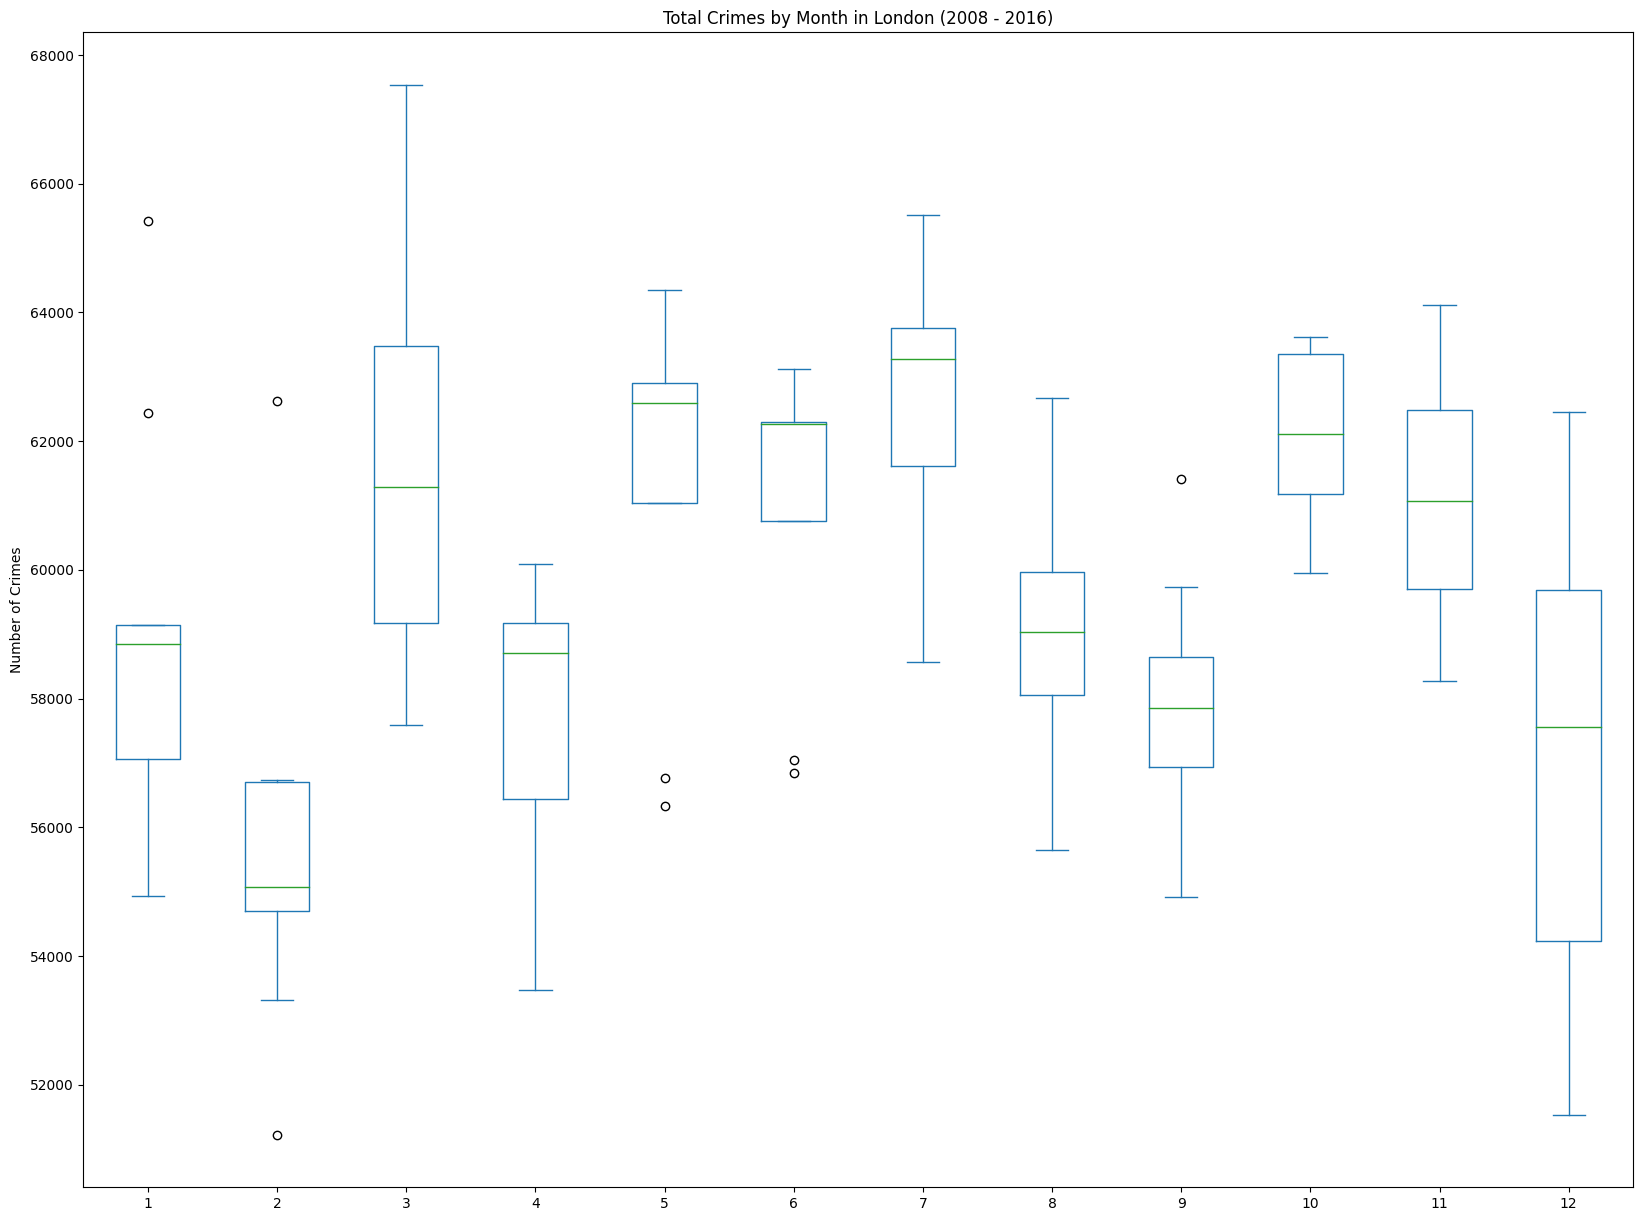

In [15]:
#Membuat Box Plot
df_total_crime_by_month_and_year.plot(kind="box", figsize=(20,15))
plt.title("Total Crimes by Month in London (2008 - 2016)")
plt.ylabel("Number of Crimes")

#Display plot
plt.show()

## Conclusion

Dari visualisasi tersebut dapat dilihat bahwa bulan 2, 4, dan 9 memiliki kejadian tindakan kriminal yang lebih minim dibanding bulan lainnya. Hal ini bisa dilihat pada:
- Bulan 2:
  - Maximumnya hanya mencapai ~57000
  - Mediannya berada di ~55000
  - Minimumnya berada di ~53000
- Bulan 4:
  - Maximumnya mencapai ~60000
  - Mediannya berada di ~59000
  - Minimumnya berada di ~53000
  - Bulan 4 dikatakan memiliki jumlah yang minim dikarenakan jarak antara minimum dan maximumnya tidak terlalu jauh dan titik minimumnya tidak jauh beda dengan bulan 2, lalu mediannya sendiri lebih kecil ke-4 dibanding bulan lainnya. Meskipun median pada bulan 12 lebih kecil dibanding bulan 4, tetapi jarak antara minimum dan maximumnya sangat jauh dan meskipun titik minimumnya jauh lebih rendah dibandingkan bulan 4, hanya saja titik maximumnya juga jauh lebih tinggi.
- Bulan 9:
  - Maximumnya mencapai ~60000
  - Mediannya berada di ~58000
  - Minimumnya berada di ~55000
  - Alasan dipilihnya bulan 9 dan bukan bulan 1 dikarenakan bulan 1 mediannya sangat mendekati nilai maximumnya sedangkan bulan 9 memiliki nilai median yang lebih rendah dibandingkan dengan bulan 1.
  

  

# Scatter Plot

## Question

Dari hasil visualisasi Pie Chart diatas, bagaimana trend ketiga kategori kriminal dengan jumlah tindakan kriminal terbanyak di London dari tahun ke tahun?

## Preprocessing

In [16]:
#Membuat DataFrame temporary untuk menampung nilai value
df_temp = df_london_crime.groupby(["major_category","year"])[["value"]].sum()

#Mengubah nama kolom value menjadi total
df_temp.rename(columns={"value":"total"}, inplace=True)

#Reset index menjadi awal terlebih dahulu
df_temp.reset_index(inplace=True)

#Membuat variabel categories untuk menampung list major_category yang ada di dalam DataFrame df_temp
categories = list(df_temp["major_category"].unique())

#Membuat variabel years untuk menampung list year yang ada di dalam DataFrame df_temp
years = list(df_temp["year"].unique())

#Inisialisasi DataFrame kosong dengan kolom dari years dan index dari categories
df_total_crime_by_category_and_year = pd.DataFrame(None, columns=years, index=categories)

#Mengisi data pada DataFrame df_total_crime_by_category_and_year
for category in categories:
    for year in years:
        total = df_temp.loc[(df_temp["year"] == year) & (df_temp["major_category"] == category)]
        for i in total["total"]:
            df_total_crime_by_category_and_year.at[category, year] = i

#Membuat kolom total untuk digunakan nanti dalam sorting
df_total_crime_by_category_and_year["total"] = df_total_crime_by_category_and_year.sum(axis=1)

#Urutkan data berdasarkan kolom total secara descending
df_total_crime_by_category_and_year.sort_values(by="total", ascending=False, inplace=True)

#Mengambil 3 data teratas
df_top3_category = df_total_crime_by_category_and_year.head(3)

#Delete kolom total
del df_top3_category["total"]

#Transpose agar year menjadi index nya dan category nya yang menjadi kolom
df_top3_category = df_top3_category.transpose()

df_top3_category.reset_index(inplace=True)
df_top3_category.rename(columns={"index":"year"}, inplace=True)
df_top3_category

,year,Theft and Handling,Violence Against the Person,Burglary
0,2008,283692,159844,88092
1,2009,279492,160777,90619
2,2010,290924,157894,86826
3,2011,309292,146901,93315
4,2012,334054,150014,93392
5,2013,306372,146181,87222
6,2014,279880,185349,76053
7,2015,284022,218740,70489
8,2016,294133,232381,68285


## Visualization

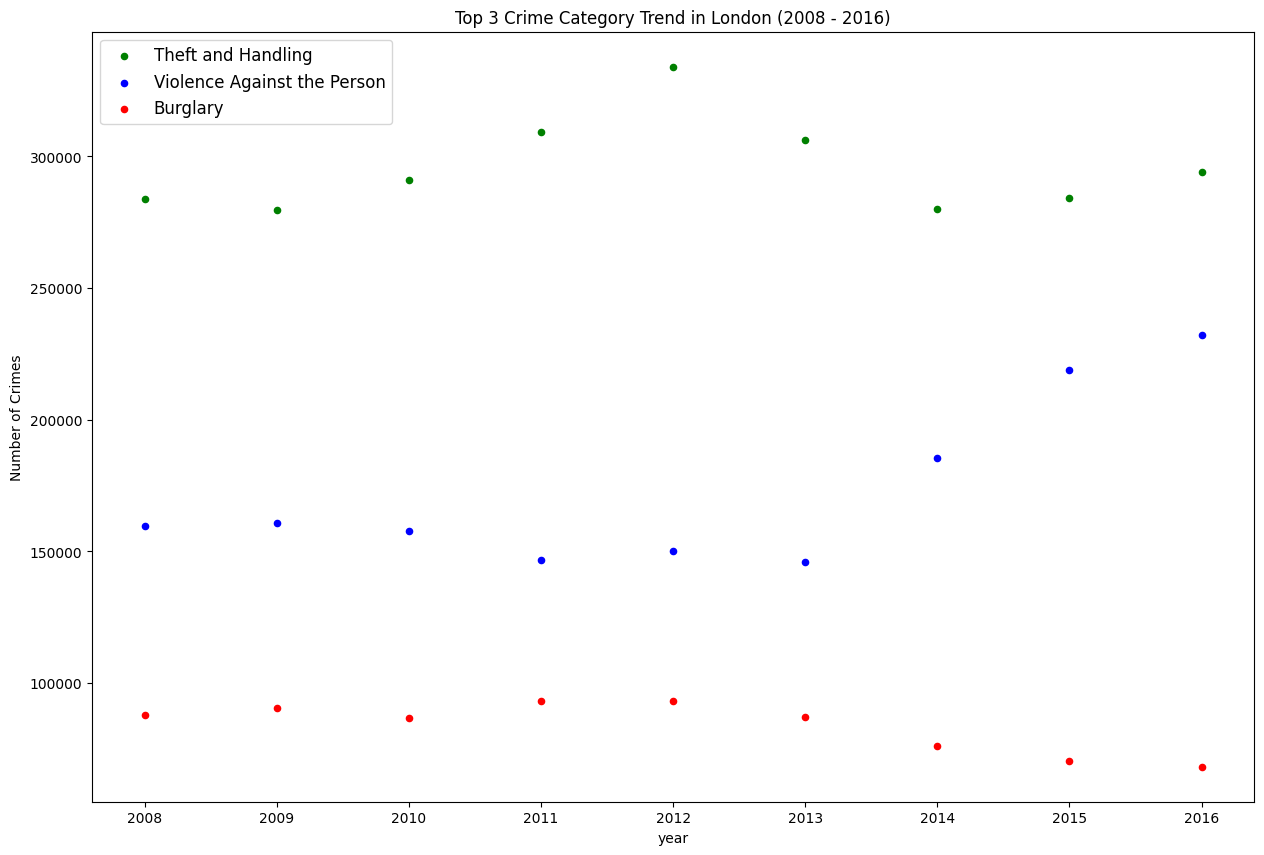

In [17]:
#Membuat dan Mendisplaykan Scatter Plot utama dan Scatter Plot lainnya
ax0 = df_top3_category.plot(kind="scatter",
                       x="year",
                       y="Theft and Handling",
                       figsize=(15,10),
                       color="green"
                      )

#Membuat Scatter Plot kedua yang dihubungkan ke Scatter Plot utama
ax1 = df_top3_category.plot(kind="scatter",
                       x="year",
                       y="Violence Against the Person",
                       color="blue",
                       ax=ax0
                      )

#Membuat Scatter Plot ketiga yang dihubungkan ke Scatter Plot utama
ax2 = df_top3_category.plot(kind="scatter",
                       x="year",
                       y="Burglary",
                       color="red",
                       ax=ax0
                      )

#Membuat keterangan pada Scatter Plot
ax0.set_ylabel("Number of Crimes")
ax0.set_title("Top 3 Crime Category Trend in London (2008 - 2016)")
ax0.legend(["Theft and Handling", "Violence Against the Person", "Burglary"], loc="upper left", fontsize="large")

## Conclusion

Dari hasil visualisasi tersebut dapat disimpulkan bahwa Violence Against the Person mengalami uptrend yang artinya jumlah tindakan kriminal pada kategori tersebut di London peningkatan dari tahun ke tahun, sedangkan Theft and Handling dan Burglary mengalami downtrend dari 2012 - 2016.

# Word Clouds

## Question

Buat sebuah Word Clouds untuk menunjukkan tahun apa yang memiliki jumlah kasus kriminal tertinggi di London.

## Preprocessing

In [18]:
#Mengambil jumlah kejahatan di London berdasarkan tahun menggunakan groupby dan sum
df_total_crime_by_borough_wc = df_london_crime.groupby(["year"])[["value"]].sum()

#Mengganti nama kolom value menjadi total
df_total_crime_by_borough_wc.rename(columns={"value":"total"}, inplace=True)
df_total_crime_by_borough_wc

,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


## Visualization

In [19]:
#Menghitung jumlah total_crime
total_crime = df_total_crime_by_borough_wc["total"].sum()
max_words = 1000
word_string = ""

#Menghitung banyaknya tahun yang muncul dengan kapasitas word 1000
for year in df_total_crime_by_borough_wc.index.values:
    repeat = int(df_total_crime_by_borough_wc.loc[year, "total"]/float(total_crime)*max_words)
    word_string = word_string + (("YEAR'" + str(year)[2:] + ' ') * repeat)

#Membuat Word Cloud
word_cloud = WordCloud().generate(word_string)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

<Figure size 1400x1800 with 0 Axes>

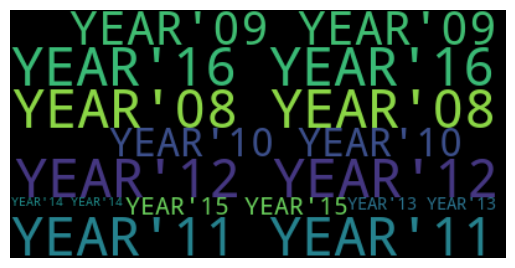

In [20]:
#Display Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium

## London MAP

In [21]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=10)
london_map

## London Crimes Choropleth Maps

### Question

Buat sebuah peta Choropleth pada London untuk menunjukkan total kejahatan dari tahun 2008 - 2016 untuk setiap masing masing wilayah

### Preprocessing

In [22]:
#Mengambil jumlah kejahatan untuk setiap wilayah di London dari tahun 2008 - 2016 menggunakan groupby dan sum
df_total_crime_by_borough_cm = df_london_crime.groupby(["borough"])[["value"]].sum()

#Mengganti nama kolom value menjadi total
df_total_crime_by_borough_cm.rename(columns={"value":"total"}, inplace=True)

#Reset index
df_total_crime_by_borough_cm.reset_index(inplace=True)

#Mengambil file GeoJSON London untuk mengambil batas - batasnya
url = "https://skgrange.github.io/www/data/london_boroughs.json"
london_geo_json = json.loads(requests.get(url).text)

### Visualization

In [23]:
#Membuat variabel untuk menampung peta London
london_crime_map = london_map

#Membuat Choropleth
folium.Choropleth(
    geo_data=london_geo_json,
    data=df_total_crime_by_borough_cm,
    columns=['borough','total'],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.5,
    legend_name="Total Crime"
).add_to(london_crime_map)

#Display Map
london_crime_map

# Overall Analysis

Dari hasil analisa dan visualisasi keseluruhan dapat disimpulkan:
1. Dari tahun 2012 - 2016, jumlah tindakan kriminal di London semakin menurun dan stabil.
2. Westminster merupakan wilayah London dengan jumlah aktivitas kriminal paling besar dan City of London merupakan wilayah dengan aktivitas paling minim.
3. Aktivitas kriminal lebih jarang terjadi dibulan Februari, April, dan September. Hal ini kemungkinan bisa disebabkan oleh faktor cuaca yang tidak mendukung.
4. Aktivitas kriminal yang paling sering terjadi di London adalah Theft and Handling. Hal ini kemungkinan disebabkan aktivitas ini lebih mudah dilakukan dibandingkan aktivitas kriminal lainnya.
5. Jumlah aktivitas kriminal Violence Against the Person mengalami peningkatan dari tahun ke tahun.